ARYAN DABAS
BCA Section B Sem V
2301201144

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


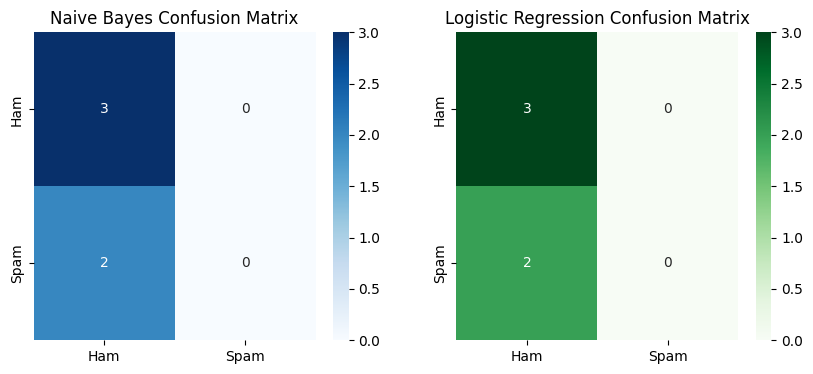

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Naive Bayes Report:
               precision    recall  f1-score   support

         ham       0.60      1.00      0.75         3
        spam       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5


Logistic Regression Report:
               precision    recall  f1-score   support

         ham       0.60      1.00      0.75         3
        spam       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



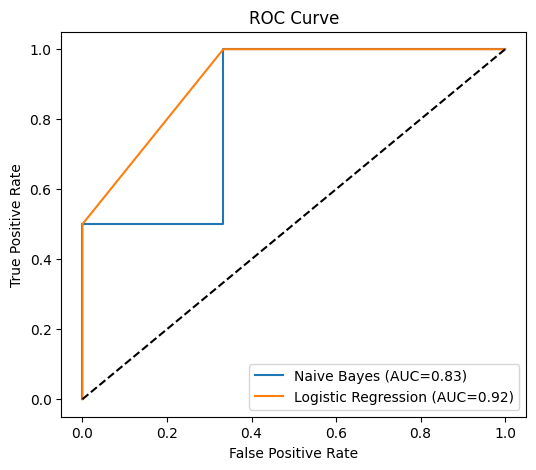

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


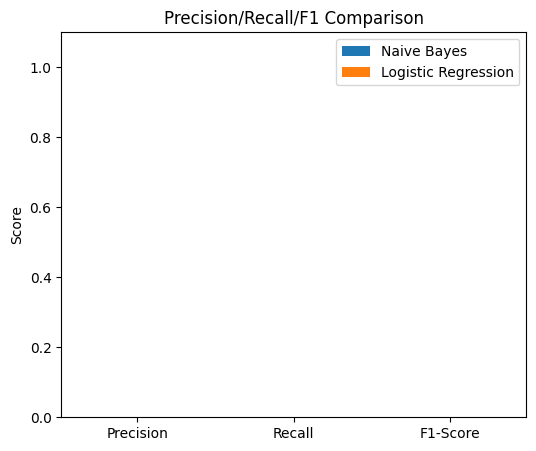

In [1]:
#QUESTION 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

data = {
    "label": [
        "ham","spam","ham","spam","ham","ham","spam","spam","ham","ham",
        "spam","ham","ham","spam","ham","spam","ham","ham","spam","ham"
    ],
    "message": [
        "Hey, are we still meeting today?",
        "Congratulations! You won a free lottery ticket. Claim now!",
        "I will send you the notes tomorrow.",
        "You have been selected for a free vacation. Call now!",
        "Can you please share the assignment?",
        "Let's go for lunch tomorrow.",
        "Get cheap loans at 0% interest. Apply today!",
        "Exclusive deal just for you. Click the link.",
        "Don't forget the meeting at 5pm.",
        "Happy Birthday! Have a great day!",
        "Win a brand new car. Send YES to claim.",
        "Are you coming for the party?",
        "I’ll call you once I’m free.",
        "Hurry! Limited time offer, buy now.",
        "Do not forget to complete your project.",
        "Congratulations, you have been chosen for a prize!",
        "Please bring my book tomorrow.",
        "Meeting postponed to next week.",
        "Get free recharge coupons. Text NOW!",
        "Thanks for your help today."
    ]
}

df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.title("Naive Bayes Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))

y_prob_nb = nb_model.predict_proba(X_test)[:,1]
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

fpr_nb, tpr_nb, _ = roc_curve(y_test.map({'ham':0,'spam':1}), y_prob_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test.map({'ham':0,'spam':1}), y_prob_lr)

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={roc_auc_nb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_lr:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

metrics_nb = precision_recall_fscore_support(y_test, y_pred_nb, average='binary', pos_label='spam')
metrics_lr = precision_recall_fscore_support(y_test, y_pred_lr, average='binary', pos_label='spam')

labels = ["Precision", "Recall", "F1-Score"]
nb_scores = metrics_nb[:3]
lr_scores = metrics_lr[:3]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,5))
plt.bar(x - width/2, nb_scores, width, label="Naive Bayes")
plt.bar(x + width/2, lr_scores, width, label="Logistic Regression")
plt.xticks(x, labels)
plt.ylim(0,1.1)
plt.ylabel("Score")
plt.title("Precision/Recall/F1 Comparison")
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Classification Report:

              precision    recall  f1-score   support

    negative      0.000     0.000     0.000         2
     neutral      0.000     0.000     0.000         1
    positive      0.500     1.000     0.667         2

    accuracy                          0.400         5
   macro avg      0.167     0.333     0.222         5
weighted avg      0.200     0.400     0.267         5

Macro-Averaged F1 Score: 0.222


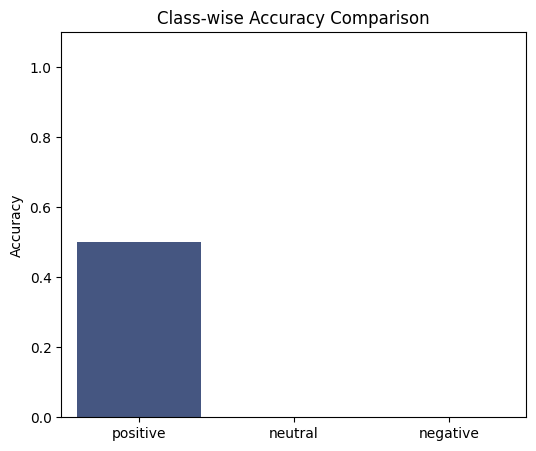

In [2]:
# QUESTION 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score

import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data = {
    "review": [
        "The phone is amazing, battery lasts long.",
        "Worst product I ever bought.",
        "Average quality, nothing special.",
        "Excellent camera and performance.",
        "Delivery was late but product is fine.",
        "Absolutely horrible, stopped working in a week.",
        "Good quality, worth the money.",
        "Not great, not terrible, just okay.",
        "Fantastic laptop, super fast.",
        "Cheap material used, very disappointed.",
        "I love it! Perfect for my needs.",
        "Neither good nor bad, just average.",
        "Highly recommended, value for money.",
        "Terrible sound quality, don’t buy.",
        "Pretty decent for the price.",
        "Awful customer service, bad experience.",
        "I’m happy with the purchase.",
        "Mediocre performance, could be better.",
        "Exceeded my expectations, very good.",
        "Broken item delivered, very poor."
    ],
    "label": [
        "positive","negative","neutral","positive","neutral",
        "negative","positive","neutral","positive","negative",
        "positive","neutral","positive","negative","neutral",
        "negative","positive","neutral","positive","negative"
    ]
}

df = pd.DataFrame(data)

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['review'].apply(preprocess)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-Averaged F1 Score:", round(f1,3))

report = classification_report(y_test, y_pred, output_dict=True)
class_acc = {cls: report[cls]["precision"] for cls in ["positive","neutral","negative"]}

plt.figure(figsize=(6,5))
sns.barplot(x=list(class_acc.keys()), y=list(class_acc.values()), palette="viridis")
plt.ylim(0,1.1)
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy Comparison")
plt.show()
